<a href="https://colab.research.google.com/github/estudos-wanderson/Modelagem-Matem-tica/blob/main/M%C3%A9todo_dos_M%C3%ADnimos_Quadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ajuste de Função Polinomial**

Ocorre quando temos como entrada uma tabela de pontos de dados, $(x_i, y_i)$ para $j= 0, 1, \dots, n-1$, e desejamos determinar uma função polinomial $f(x)$ mais próxima dos dados, considerando uma ordem do polinômio $m < n$. Essa metodologia não se limita a retas. Podemos usar o mesmo princípio dos mínimos quadrados para ajustar funções mais complexas, como polinômios de grau $m$:
$$ p(x) = a_0 + a_1x + a_2x^2 + \dots + a_mx^m $$

Se queremos ajustar um polinômio de grau $m$ a $n$ pontos de dados $(x_i, y_i)$, o resíduo para cada ponto é:

$$ e_i = y_i - (a_0 + a_1x_i + a_2x_i^2 + \dots + a_mx_i^m) $$
A soma dos quadrados dos resíduos $Q(a_0, a_1, \dots, a_m)$ é:

$$ Q = \sum_{i} [y_i - (a_0 + a_1x_i + a_2x_i^2 + \dots + a_mx_i^m)]^2 $$

Para minimizar $Q$, tomamos as derivadas parciais em relação a cada coeficiente $a_j$ ($j= 0, \dots, m$) e as igualamos a zero. Isso resultará em um sistema de $m+1$ equações lineares com $m+1$ incógnitas ($a_0, \dots, a_m$).

## **Forma Matricial do Ajuste Polinomial**

A forma matricial para o ajuste polinomial é uma generalização direta do caso linear. O vetor de parâmetros é:
$$ \mathbf{z} = \begin{bmatrix} a_0 \\ a_1 \\ \vdots \\ a_m \end{bmatrix} $$
A matriz $A$ (matriz de Vandermonde) para um polinômio de grau $m$ e $n$ pontos é:

$$ A = \begin{bmatrix}
1 & x_1 & x_1^2 & \dots & x_1^m \\
1 & x_2 & x_2^2 & \dots & x_2^m \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \dots & x_n^m
\end{bmatrix} $$

Note que cada coluna corresponde a uma potência de $x$. A primeira coluna ($x^0$) é de $1$s (para o coeficiente $a_0$), a segunda é $x_i$ (para $a_1$), e assim por diante. Além disso, observe que temos $m$ incógnitas e $n$ pontos de dados. Logo, possuímos um sistema com mais equações que incógnitas. Assim, pelo princípio dos mínimos quadrados, a forma matricial do sistema de equações permanece igual; veja!

$$ A^\top A \mathbf{z} = A^\top \mathbf{y} $$

E a solução é:

$$ \mathbf{z} = (A^\top A)^{-1} A^\top \mathbf{y} $$

Que fornece os coeficientes $a_0, \dots, a_m$.

In [16]:
import numpy as np
from typing import List, Tuple

def least_square_fit(p: List[Tuple[float]], m: int):
    x, B = map(np.array, zip(*p))
    n = len(x)
    A = np.zeros([n, m+1])
    for k in range(m+1):
        A[:, k] = x ** k

    a = A.T @ A
    b = A.T @ B
    sol = np.linalg.solve(a, b)
    return np.poly1d(sol[::-1])

In [33]:
points = [
    (1, 100),
    (2, 300),
    (3, 200),
    (4, 400),
    (5, 200)
]
m = 2

pol = least_square_fit(points, m)
print(pol)

        2
-35.71 x + 244.3 x - 100


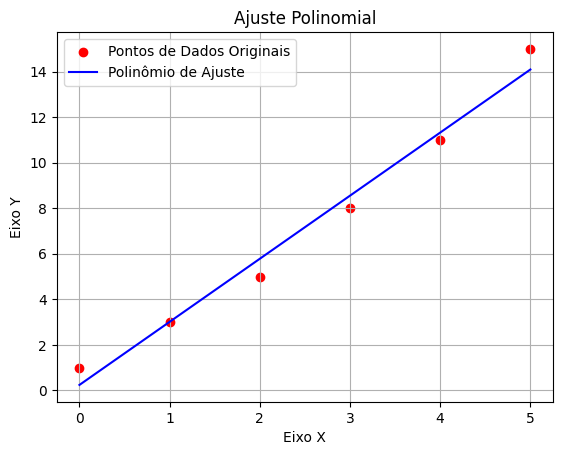

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def plotar_ajuste_polinomial(pontos: list, m: int):
    """
    Plota os pontos de dados originais e o polinômio de ajuste usando subplots.

    Args:
        pontos (list): Lista de tuplas (x, y) dos pontos de dados originais.
        polinomio (np.poly1d): O objeto np.poly1d que representa o polinômio de ajuste.
    """
    # 1. Preparar os dados para plotagem
    x_orig, y_orig = zip(*pontos)
    polinomio = least_square_fit(pontos, m)

    # Gerar pontos suaves para a linha do polinômio
    # Usamos os limites dos pontos originais para definir o intervalo do gráfico
    x_min, x_max = min(x_orig), max(x_orig)
    x_linha = np.linspace(x_min, x_max, 400)
    y_linha = polinomio(x_linha)

    # 2. Criar a figura e os eixos
    fig, ax = plt.subplots()

    # 3. Plotar os dados usando os métodos do objeto 'ax'
    # Plotar os pontos de dados originais
    ax.scatter(x_orig, y_orig, color='red', label='Pontos de Dados Originais')

    # Plotar a linha do polinômio de ajuste
    ax.plot(x_linha, y_linha, color='blue', label='Polinômio de Ajuste')

    # 4. Configurar o gráfico usando os métodos do objeto 'ax'
    ax.set_title('Ajuste Polinomial')
    ax.set_xlabel('Eixo X')
    ax.set_ylabel('Eixo Y')
    ax.grid(True)
    ax.legend()

    # Opcional: ajustar a escala dos eixos para evitar espaços em branco
    ax.axis('tight')

    # 5. Exibir o gráfico
    plt.show()

points = [(0, 1), (1, 3), (2, 5), (3, 8), (4, 11), (5, 15)]

# Chamar a função para plotar o gráfico
plotar_ajuste_polinomial(points, m=1)

# **Ajuste de Funções Não Polinomiais**

Às vezes, na procura de uma modelagem matemática adequada para descrever algum fenômeno natural, as funções polinomiais não apresentam boa resposta. Dentro da ciência, é comum os dados terem semelhanças com funções trigonométricas, devido à periodicidade, ou com funções exponenciais e logarítmicas, por causa do crescimento.

O poder do método dos mínimos quadrados reside no fato de que ele se aplica a qualquer modelo que seja linear nos parâmetros que queremos estimar, mesmo que as funções base envolvidas não sejam polinomiais.

Considere um modelo da forma:

$$ y = m_1f_1(x) + m_2f_2(x) + \dots + m_kf_k(x) $$

Na equação, $f_1(x), f_2(x), \dots, f_k(x)$ são funções conhecidas de $x$, chamadas funções base, e $m_1, m_2, \dots, m_k$ são os parâmetros a serem estimados. Assim, a matriz $A$ para esse caso terá colunas formadas pelos valores das funções base $f_j(x_i)$. Veja!

$$ A = \begin{bmatrix}
f_1(x_1) & f_2(x_1) & \dots & f_k(x_1) \\
f_1(x_2) & f_2(x_2) & \dots & f_k(x_2) \\
\vdots & \vdots & \ddots & \vdots \\
f_1(x_n) & f_2(x_n) & \dots & f_k(x_n)
\end{bmatrix} \quad \text{e o vetor de parâmetros:} \quad \mathbf{z} = \begin{bmatrix} m_1 \\ m_2 \\ \vdots \\ m_k \end{bmatrix} $$

Assim, teremos o mesmo sistema de equações já visto:

$$ A^\top A \mathbf{z} = A^\top \mathbf{y} $$

Com a seguinte solução:

$$ \mathbf{z} = (A^\top A)^{-1} A^\top \mathbf{y} $$

In [39]:
import numpy as np
from typing import List, Tuple, Callable

def least_square_fit_non_polynomial(points: List[Tuple[float]], *functions: Callable):
    x, B = map(np.array, zip(*points))
    n = len(x)
    k = len(functions)
    A = np.zeros([n, k])
    for row in range(n):
        A[row] = np.array([f(x[row]) for f in functions])
    a = A.T @ A
    b = A.T @ B
    sol = np.linalg.solve(a, b)
    return sol

In [40]:
from math import log, sin, exp

points = [(1,100),(2,300),(3,200),(4,400),(5,200)]
sol = least_square_fit_non_polynomial(points, log, sin, exp)
print(sol)

[304.15955733  69.18550992  -1.33592329]
